In [1]:
import pandas as pd
import numpy as np
import os
data_dir="E:\Work\Python\PythonTrainings\PythonForModellers\Data"
os.chdir(data_dir)

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
data=pd.read_csv("HR_comma_sep.csv")

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
X=data.drop("left",axis=1)

In [9]:
y=data["left"]

In [14]:
X=pd.get_dummies(X)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [10]:
import sklearn.model_selection as model_selection

In [15]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.20,random_state=200)

In [12]:
import sklearn.ensemble as ensemble

In [13]:
## bagged model
clf=ensemble.BaggingClassifier(n_estimators=50,oob_score=True,random_state=200)

In [16]:
clf=clf.fit(X_train,y_train)

In [19]:
clf.estimators_[0].feature_importances_

array([  4.77625380e-01,   1.53267218e-01,   1.04945950e-01,
         8.90732121e-02,   1.53664718e-01,   4.84414312e-04,
         3.27826513e-04,   1.65702826e-03,   1.19518742e-03,
         1.71166696e-03,   8.44145724e-04,   1.03360719e-03,
         8.01196523e-04,   0.00000000e+00,   2.05503381e-03,
         3.65934441e-03,   3.12720583e-03,   3.08928087e-04,
         2.25826508e-03,   1.95967209e-03])

In [20]:
f_i=[]
for tree in clf.estimators_:
    f_i.append(tree.feature_importances_)
    

In [26]:
feature_imp=np.mean(f_i,axis=0)

In [27]:
pd.Series(feature_imp,index=X_train.columns).sort_values(ascending=False)

satisfaction_level       0.491749
last_evaluation          0.142674
time_spend_company       0.138017
number_project           0.108358
average_montly_hours     0.095594
sales_technical          0.003559
salary_low               0.003418
salary_medium            0.002769
sales_sales              0.002492
sales_support            0.002356
salary_high              0.001660
sales_IT                 0.001334
Work_accident            0.001178
sales_accounting         0.001140
sales_hr                 0.000818
sales_management         0.000788
sales_RandD              0.000734
sales_marketing          0.000702
sales_product_mng        0.000514
promotion_last_5years    0.000146
dtype: float64

In [28]:
### Parameter tuning for bagged tree model
clf.oob_score_

0.98766563880323355

In [33]:
### 
score=[]
param_grid=[10,20,30,40,50,60,70,80]
for i in param_grid:
    clf=ensemble.BaggingClassifier(n_estimators=i,oob_score=True,random_state=200)
    clf=clf.fit(X_train,y_train)
    score.append(clf.oob_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


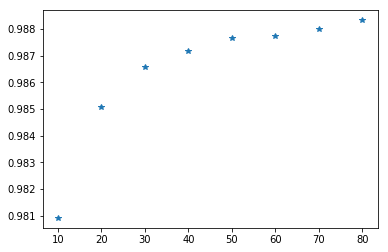

In [34]:
plt.plot(param_grid,score,"*")

In [35]:
clf=ensemble.RandomForestClassifier(n_estimators=30,oob_score=True,random_state=200)

In [36]:
clf=clf.fit(X_train,y_train)

In [37]:
clf.feature_importances_

array([ 0.29647654,  0.12781784,  0.19688599,  0.15085741,  0.18355301,
        0.0090684 ,  0.00159122,  0.00173346,  0.00142655,  0.00178552,
        0.00161078,  0.00113725,  0.00141595,  0.00105491,  0.0033331 ,
        0.00266533,  0.00379205,  0.00310262,  0.00723395,  0.00345811])